In [1]:
 # imports numpy library for numerical computing and pylab for plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Recall that we discussed indicator random variables in class, i.e. random variables that take one of two values - 1 for success and 0 for failure. The value of said random variable is said to be the result of a bernouilli trial (for this reason, indicator variables are also called bernouilli variables). To get a value for a bernouilli trial when we know the probability of success, $p$, we simple sample a uniform distribution from 0 to 1 inclusive and check if what we get back is less than or equal to $p$. We return 1 (for success) if it is and 0 otherwise.

When we have a sequence of size $n$ **independent** bernoulli trials of the same parameter $p$ and we are interested in the number of successes, we can model said sequence as a binomial distribution. We simply run $n$ such trials and count the successes. Since we store 1 for success and 0 for failure, we can simply sum and array of successes.

In [2]:

# Performs a Bernoulli trial
# We will discuss next class
def bernoulli_trial(p):
    """
    Runs a bernoulli trial
    :param p: the probability of success
    :returns 1 if success, 0 if failure
    """
    m = numpy.random.random_sample() # samples from uniform distribution in [0, 1]
    if m <= p:
        return 1
    return 0


# Represents a Binomial Distribution 
# Will also discuss next class
class BinomialDistribution(object):
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def sample(self):
        results = [bernoulli_trial(self.p) for _ in range(self.n)] # runs n bernoulli trials and records results
        return sum(results) # Gives number of successes


    
    
    

In [3]:
coin_distribuion = BinomialDistribution(2, 0.5) # Two fair coin tosses, where success is heads (i.e. n = 2 and p = 0.5)
coin_distribuion.sample() # gives one of either 0, 1, or 2

1

In [4]:
results = [] # holds the results of each simulation in a list
num_runs = 50000 # number of runs of simulation
for _ in range(num_runs):
    result = coin_distribuion.sample() # get result of run
    results.append(result) # insert result to the back of the list


In [5]:
results_mean = numpy.mean(results) # should be close to 1 as discussed in class
results_variance = numpy.var(results) # should be close to 0.5 as discussed in class

print('Mean is ', results_mean) 
print('Variance is ', results_variance)


Mean is  1.0078
Variance is  0.49821916


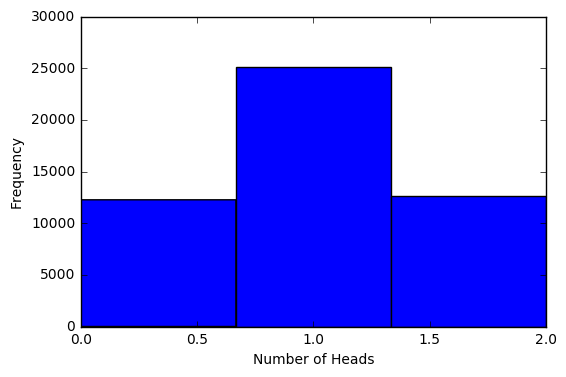

In [6]:
plt.hist(results, bins=3) # plot histogram with 3 bins
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

As seen above, the mean of the results obtained from the simulation is close to 1, the expected mean. Similarly, the varaiance is close to 0.5. Also notice that as expected 1 was also the most frequently obtained number of heads and that the number of times we got 0 and 2 were almost the same, which should be expected as $P(X = 0)$ and $P(X = 2)$ are both 0.25